In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
import os

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')

In [76]:
data_file = os.path.join(os.getcwd(), "datasets", "spotify_data.csv")
df = pd.read_csv(data_file)
df.head(5)

,Title,Artists,Danceability,Energy,Loudness_fixed,Speechiness,Acousticness,Instrumentalness,Valence,Song URL
0,Ella Baila Sola,"Eslabon Armado, Peso Pluma",0.668,0.758,-5.176,0.033,0.483,0.000,0.834,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,WHERE SHE GOES,Bad Bunny,0.652,0.800,-4.019,0.061,0.143,0.629,0.234,https://open.spotify.com/track/7ro0hRteUMfnOio...
2,La Bebe - Remix,"Yng Lvcas, Peso Pluma",0.812,0.479,-5.678,0.333,0.213,0.000,0.559,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
3,Cupid - Twin Ver.,FIFTY FIFTY,0.783,0.592,-8.332,0.033,0.435,0.000,0.726,https://open.spotify.com/track/7FbrGaHYVDmfr7K...
4,un x100to,"Grupo Frontera, Bad Bunny",0.569,0.724,-4.076,0.047,0.228,0.000,0.562,https://open.spotify.com/track/6pD0ufEQq0xdHSs...


In [77]:
print(f"The shape of the data is {df.shape}")

The shape of the data is (7801, 10)


In [78]:
# Information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7801 entries, 0 to 7800
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             7801 non-null   object 
 1   Artists           7801 non-null   object 
 2   Danceability      7801 non-null   float64
 3   Energy            7801 non-null   float64
 4   Loudness_fixed    7801 non-null   float64
 5   Speechiness       7801 non-null   float64
 6   Acousticness      7801 non-null   float64
 7   Instrumentalness  7801 non-null   float64
 8   Valence           7801 non-null   float64
 9   Song URL          7801 non-null   object 
dtypes: float64(7), object(3)
memory usage: 609.6+ KB


In [79]:
# Check if our dataset has null values
df.isnull().sum()

Title               0
Artists             0
Danceability        0
Energy              0
Loudness_fixed      0
Speechiness         0
Acousticness        0
Instrumentalness    0
Valence             0
Song URL            0
dtype: int64

In [80]:
# Print Columns that exist in our datasets
df.columns.tolist()

['Title',
 'Artists',
 'Danceability',
 'Energy',
 'Loudness_fixed',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Valence',
 'Song URL']

In [81]:
# Statistics of our data - We can see that there's a lot of variation in the magnitude of the data e.g
# danceability and energy have higher values compared to other features e.g instrumentalness, speechness
df.describe()

,Danceability,Energy,Loudness_fixed,Speechiness,Acousticness,Instrumentalness,Valence
count,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000
mean,0.674994,0.635718,-5.829709,0.131199,0.236025,0.014107,0.487765
std,0.148479,0.171966,3.179626,0.120004,0.249982,0.083961,0.226527
min,0.073000,0.005000,-34.475000,0.022000,0.000000,0.000000,0.026000
25%,0.582000,0.530000,-7.428000,0.045000,0.041000,0.000000,0.311000
50%,0.692000,0.651000,-5.751000,0.077000,0.141000,0.000000,0.485000
75%,0.784000,0.761000,-4.194000,0.188000,0.355000,0.000000,0.661000
max,0.985000,0.996000,1.509000,0.966000,0.994000,0.956000,0.978000


In [82]:
most_frequent = df['Title'].value_counts().head(10)
most_frequent

Title
Intro          9
Alone          5
Heaven         5
Sleigh Ride    5
Paradise       4
Miss You       4
Run            4
All Night      4
Moonlight      4
Ruway          4
Name: count, dtype: int64

In [83]:
numerical_features = ['Danceability',	'Energy',	'Loudness_fixed',	'Speechiness', 	'Acousticness',	'Instrumentalness',	'Valence']
X = df[numerical_features].copy()
X.head()

,Danceability,Energy,Loudness_fixed,Speechiness,Acousticness,Instrumentalness,Valence
0,0.668,0.758,-5.176,0.033,0.483,0.000,0.834
1,0.652,0.800,-4.019,0.061,0.143,0.629,0.234
2,0.812,0.479,-5.678,0.333,0.213,0.000,0.559
3,0.783,0.592,-8.332,0.033,0.435,0.000,0.726
4,0.569,0.724,-4.076,0.047,0.228,0.000,0.562


In [84]:
# Check to see if we have any missing values in our numerical features
X.isnull().sum()

Danceability        0
Energy              0
Loudness_fixed      0
Speechiness         0
Acousticness        0
Instrumentalness    0
Valence             0
dtype: int64

In [85]:
# We don't need this but this is still important to handle any missing values in case our dataset is tampered
if X.isnull().sum().any():
    print("Handling missing values")
    X = X.fillna(X.mean())
else:
    print("Our spotify dataset has no null values in the numerical features")

Our spotify dataset has no null values in the numerical features


In [86]:
# Remove variation in the magnitude of our data by standardising it

In [87]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features)
X_scaled_df

,Danceability,Energy,Loudness_fixed,Speechiness,Acousticness,Instrumentalness,Valence
0,-0.047111,0.711128,0.205606,-0.818356,0.988031,-0.168023,1.528552
1,-0.154877,0.955379,0.569509,-0.585014,-0.372151,7.324001,-1.120313
2,0.922787,-0.911393,0.047716,1.681729,-0.092114,-0.168023,0.314489
3,0.727460,-0.254243,-0.787027,-0.818356,0.796005,-0.168023,1.051756
4,-0.713915,0.513402,0.551581,-0.701685,-0.032106,-0.168023,0.327733
...,...,...,...,...,...,...,...
7796,0.363749,1.467142,0.932782,-0.076664,-0.476165,-0.168023,1.378449
7797,-0.181819,0.583187,-0.666250,-0.768354,-0.768205,-0.168023,-0.484586
7798,-1.468280,1.531112,1.018647,0.006672,-0.936227,-0.168023,-0.837768
7799,-1.535634,1.234522,-0.108602,0.756698,-0.812211,-0.168023,-0.012205


In [88]:
# Print our standardised data to confirm that our variables are of the same magnitude
print("Scaled Data Statistics:")
print(X_scaled_df.describe())

Scaled Data Statistics:
       Danceability        Energy  Loudness_fixed   Speechiness  Acousticness  \
count  7.801000e+03  7.801000e+03    7.801000e+03  7.801000e+03  7.801000e+03   
mean   6.922349e-16  6.193681e-17   -8.015352e-17  1.384470e-16  4.372010e-17   
std    1.000064e+00  1.000064e+00    1.000064e+00  1.000064e+00  1.000064e+00   
min   -4.054674e+00 -3.667934e+00   -9.009590e+00 -9.100253e-01 -9.442282e-01   
25%   -6.263551e-01 -6.148032e-01   -5.026986e-01 -7.183522e-01 -7.802062e-01   
50%    1.145389e-01  8.887089e-02    2.475571e-02 -4.516764e-01 -3.801525e-01   
75%    7.341958e-01  7.285746e-01    5.144673e-01  4.733550e-01  4.759623e-01   
max    2.088011e+00  2.095214e+00    2.308189e+00  6.956908e+00  3.032305e+00   

       Instrumentalness       Valence  
count      7.801000e+03  7.801000e+03  
mean      -1.093003e-17 -2.186005e-16  
std        1.000064e+00  1.000064e+00  
min       -1.680229e-01 -2.038586e+00  
25%       -1.680229e-01 -7.803755e-01  
50%   

In [108]:
def get_cluster_inertias(X_scaled, max_k=10):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
    return inertias

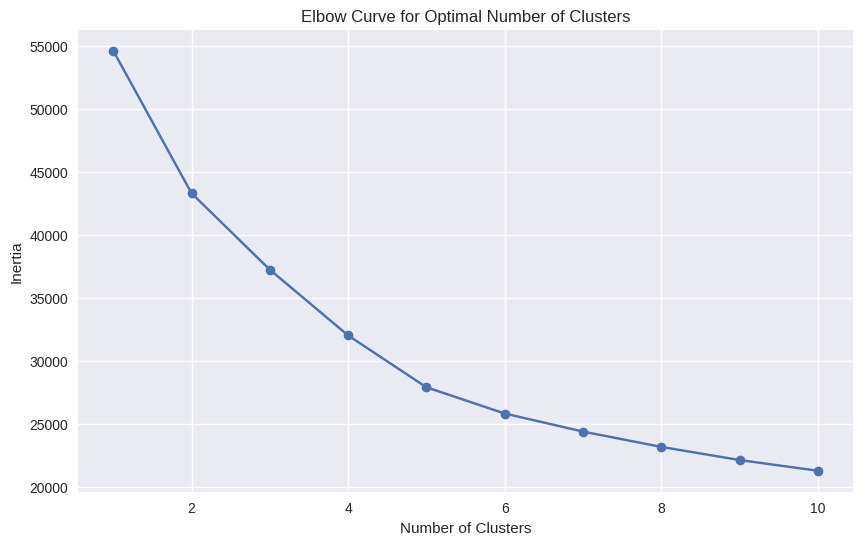

In [109]:
# Plot our elbow curve that will help us find optimal k
max_k = 10
inertias = get_cluster_inertias(X_scaled, max_k)
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Optimal Number of Clusters')
plt.grid(True)
plt.show()   

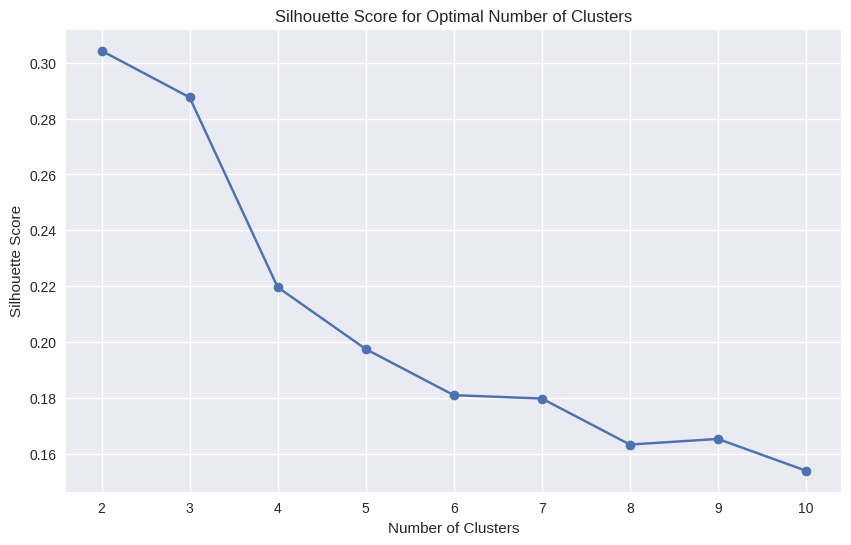

Optimal number of clusters (silhouette): 2


In [110]:
def find_optimal_clusters_silhouette(X_scaled, max_k=10):
    
    silhouette_scores = []    
    for k in range(2, max_k + 1):  
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Optimal Number of Clusters')
    plt.grid(True)
    plt.show()
    
    best_k = range(2, max_k + 1)[np.argmax(silhouette_scores)]
    print(f"Optimal number of clusters (silhouette): {best_k}")
    return best_k, silhouette_scores

optimal_k, silhouette_scores = find_optimal_clusters_silhouette(X_scaled)

In [2]:
# From Elbow curve, there is a constant decrease in inertia between 5 and 7, so we can choose any K between 5 and 7
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42) # n_init=10 init='k-means++' K-Means++ to initialize the centroids
cluster_labels = kmeans.fit_predict(X_scaled)

df['Cluster'] = cluster_labels
X_scaled_df['Cluster'] = cluster_labels

print(f"Clustering completed with {n_clusters} clusters")
print("\nSong distribution in each cluster:")
print(df['Cluster'].value_counts().sort_index())

NameError: name 'KMeans' is not defined

In [112]:
cluster_analysis = df.groupby('Cluster')[numerical_features].mean()
print("Cluster Characteristics (mean values):")
print(cluster_analysis)

def interpret_clusters(cluster_analysis):
    """Provide simple interpretation of each cluster"""
    interpretations = []
    
    for cluster_id in cluster_analysis.index:
        features = cluster_analysis.loc[cluster_id]
        
        # interpretation based on feature values
        interpretation = f"Cluster {cluster_id}: "
        
        if features['Energy'] > 0.5 and features['Valence'] > 0.5:
            interpretation += "Happy/Upbeat"
        elif features['Energy'] < 0.5 and features['Valence'] < 0.5:
            interpretation += "Sad/Calm"
        elif features['Acousticness'] > 0.5:
            interpretation += "Acoustic/Relaxed"
        elif features['Danceability'] > 0.5:
            interpretation += "Danceable/Energetic"
        else:
            interpretation += "Mixed Mood"
            
        interpretations.append(interpretation)
    
    return interpretations

interpretations = interpret_clusters(cluster_analysis)
for interpretation in interpretations:
    print(interpretation)

Cluster Characteristics (mean values):
         Danceability    Energy  Loudness_fixed  Speechiness  Acousticness  \
Cluster                                                                      
0            0.732773  0.762797       -3.947624     0.098039      0.168694   
1            0.726381  0.617069       -6.327220     0.347596      0.205987   
2            0.514408  0.357092       -9.807410     0.066656      0.717914   
3            0.768319  0.560744       -6.805319     0.097639      0.206637   
4            0.546057  0.700181       -4.920887     0.078261      0.120368   

         Instrumentalness   Valence  
Cluster                              
0                0.004350  0.708615  
1                0.002774  0.487959  
2                0.051330  0.334306  
3                0.006362  0.418647  
4                0.024241  0.330526  
Cluster 0: Happy/Upbeat
Cluster 1: Danceable/Energetic
Cluster 2: Sad/Calm
Cluster 3: Danceable/Energetic
Cluster 4: Danceable/Energetic


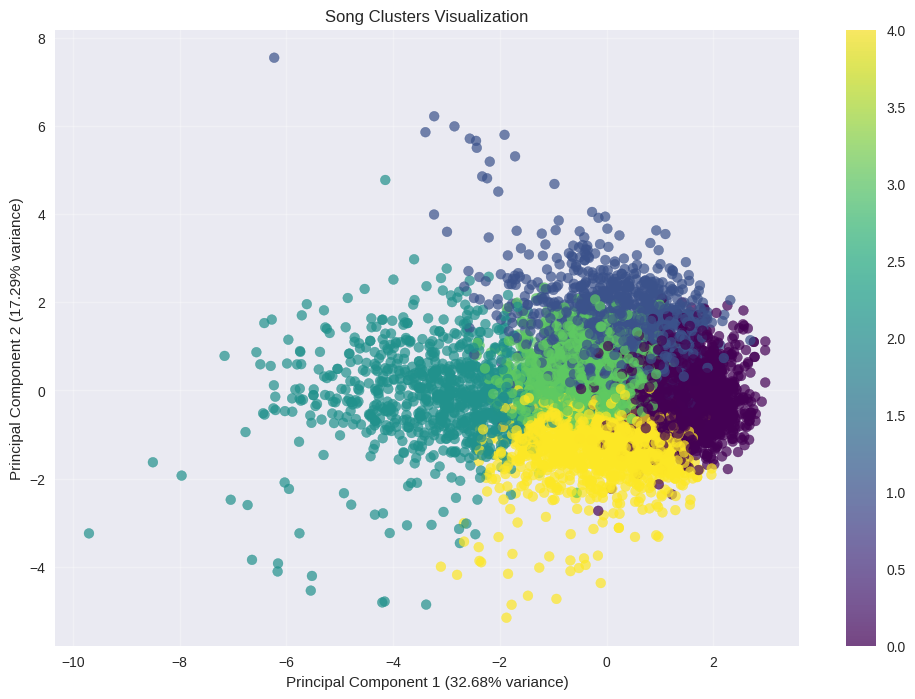

In [118]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels
pca_df['Title'] = df['Title'].values

plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], 
                     cmap='viridis', alpha=0.7, s=50)
plt.colorbar(scatter)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('Song Clusters Visualization')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Get the unique cluster assignments
unique_clusters = np.unique(cluster_labels)

# Create a grid of subplots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(8, 8), sharex=True, sharey=True)

# Flatten the array of subplots to make it easier to iterate over
axs = axs.flatten()

# Iterate over the clusters
for i, cluster in enumerate(unique_clusters):
    # Select the data points belonging to the current cluster
    df_cluster = X_pca[cluster_labels == cluster]
    
    # Select the data points belonging to other clusters
    df_other_clusters = X_pca[cluster_labels != cluster]
    
    # Plot the data points belonging to other clusters in gray
    axs[i].scatter(df_other_clusters[:, 0], df_other_clusters[:, 1], c='gray', label='Other clusters', alpha=0.5)
    
    # Plot the data points belonging to the current cluster with a different color
    axs[i].scatter(df_cluster[:, 0], df_cluster[:, 1], c='red', label='Cluster {}'.format(cluster))
    
    # Set the x and y labels for the current subplot
    axs[i].set_xlabel('Component 1')
    axs[i].set_ylabel('Component 2')
    
    # Add a legend to the current subplot
    axs[i].legend()

plt.show()


In [120]:
def analyse_each_cluster(df, numerical_features):
    
    print("DETAILED CLUSTER ANALYSIS")
    print("=" * 60)
    
    for cluster_id in sorted(df['Cluster'].unique()):
        cluster_songs = df[df['Cluster'] == cluster_id]
        
        print(f"\nCLUSTER {cluster_id} - {len(cluster_songs)} songs")
        print("-" * 40)
        
        print("Sample songs:")
        for title in cluster_songs['Title'].head(5):
            print(f"  • {title}")
    
        print("\nMusical Characteristics:")
        cluster_means = cluster_songs[numerical_features].mean()
        
        high_features = cluster_means.nlargest(3)
        print("  High in:", ", ".join([f"{feat}({val:.2f})" 
                                     for feat, val in high_features.items()]))
        
        low_features = cluster_means.nsmallest(3)
        print("  Low in:", ", ".join([f"{feat}({val:.2f})" 
                                    for feat, val in low_features.items()]))
  
        energy = cluster_means['Energy']
        valence = cluster_means['Valence']
        acousticness = cluster_means['Acousticness']
        
        if energy > 0.6 and valence > 0.6:
            mood = "Happy & Energetic"
        elif energy < 0.4 and valence < 0.4:
            mood = "Sad & Calm"
        elif acousticness > 0.6:
            mood = "Acoustic & Intimate"
        elif energy > 0.6:
            mood = "High Energy"
        else:
            mood = "Mixed Mood"
            
        print(f"Mood: {mood}")

analyse_each_cluster(df, numerical_features)

DETAILED CLUSTER ANALYSIS

CLUSTER 0 - 2312 songs
----------------------------------------
Sample songs:
  • Ella Baila Sola
  • Flowers
  • As It Was
  • Classy 101
  • TQM

Musical Characteristics:
  High in: Energy(0.76), Danceability(0.73), Valence(0.71)
  Low in: Loudness_fixed(-3.95), Instrumentalness(0.00), Speechiness(0.10)
Mood: Happy & Energetic

CLUSTER 1 - 1282 songs
----------------------------------------
Sample songs:
  • La Bebe - Remix
  • TQG
  • All My Life (feat. J. Cole)
  • Starboy
  • Hey Mor

Musical Characteristics:
  High in: Danceability(0.73), Energy(0.62), Valence(0.49)
  Low in: Loudness_fixed(-6.33), Instrumentalness(0.00), Acousticness(0.21)
Mood: High Energy

CLUSTER 2 - 898 songs
----------------------------------------
Sample songs:
  • Daylight
  • Acróstico
  • Say Yes To Heaven
  • Here With Me
  • People

Musical Characteristics:
  High in: Acousticness(0.72), Danceability(0.51), Energy(0.36)
  Low in: Loudness_fixed(-9.81), Instrumentalness(0.05)

In [95]:
# Save the clustered data
df.to_csv('music_data_with_clusters.csv', index=False)

# Save cluster centers for future use
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=numerical_features)
cluster_centers.to_csv('cluster_centers.csv', index=False)

print("Results saved successfully!")
print(f"Clustered data saved as: music_data_with_clusters.csv")

Results saved successfully!
Clustered data saved as: music_data_with_clusters.csv


In [27]:
# Function to create mood-based playlists
def create_mood_playlists(df, cluster_descriptions=None):
    """Create playlists based on clusters"""
    
    if cluster_descriptions is None:
        cluster_descriptions = {
            0: "Happy_Upbeat",
            1: "Sad_Calm", 
            2: "Acoustic_Relaxed",
            3: "Danceable_Energetic"
        }
    
    for cluster_id in df['Cluster'].unique():
        cluster_songs = df[df['Cluster'] == cluster_id]
        mood_name = cluster_descriptions.get(cluster_id, f"Cluster_{cluster_id}")
        
        print(f"\n{mood_name} Playlist ({len(cluster_songs)} songs):")
        print("-" * 50)
        
        for _, song in cluster_songs.iterrows():
            print(f"{song['Title']} - {song['Artists']}")
            
        # You could also save these to files
        playlist_df = cluster_songs[['Title', 'Artists', 'Song URL']]
        playlist_df.to_csv(f'{mood_name}_playlist.csv', index=False)

# Create playlists
create_mood_playlists(df)


Happy_Upbeat Playlist (4374 songs):
--------------------------------------------------
Ella Baila Sola - Eslabon Armado, Peso Pluma
Cupid - Twin Ver. - FIFTY FIFTY
un x100to - Grupo Frontera, Bad Bunny
Flowers - Miley Cyrus
Kill Bill - SZA
As It Was - Harry Styles
Classy 101 - Feid, Young Miko
TQM - Fuerza Regida
Anti-Hero - Taylor Swift
Calm Down (with Selena Gomez) - Rema, Selena Gomez
Angel Pt. 1 (feat. Jimin of BTS, JVKE & Muni Long) - Kodak Black, NLE Choppa, Jimin, JVKE, Muni Long
Angels Like You - Miley Cyrus
Last Night - Morgan Wallen
El Azul - Junior H, Peso Pluma
Die For You - The Weeknd
Yandel 150 - Yandel, Feid
Boy's a Liar Pt. 2 - PinkPantheress, Ice Spice
Cruel Summer - Taylor Swift
I'm Good (Blue) - David Guetta, Bebe Rexha
Hits Different - Taylor Swift
PRC - Peso Pluma, Natanael Cano
I Ain't Worried - OneRepublic
Dance The Night (From Barbie The Album) - Dua Lipa
Moonlight - Kali Uchis
Tattoo - Loreen
Like Crazy - Jimin
AMG - Natanael Cano, Peso Pluma, Gabito Ballester